In [6]:
cd Soft_Computing/


/home/anshul/Desktop/workspace/Mtech/Soft_Computing


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

[[ 1.          0.29912127  0.0369527  -0.41849422  0.22779382  0.66969107]
 [ 1.         -0.7190957  -1.03311593 -0.33802769 -1.15127264 -1.61164115]
 [ 1.         -1.70843065  0.02269827 -0.28862981 -0.92494454 -1.04921985]
 ...
 [ 1.          0.35420357  0.02640567  0.49933012  1.5156715   0.58852227]
 [ 1.          0.35417406  0.03811839  0.87769314  0.28663194  0.83921419]
 [ 1.          0.35415929  0.03748634 -0.42408176  0.2283755   0.66427238]]


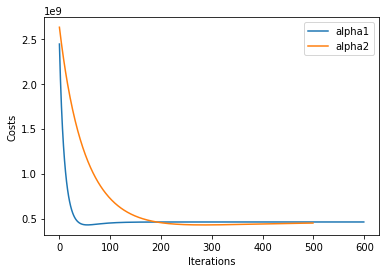

In [7]:
file = 'Housing_Price_data_set.csv'
dataFrame = pd.read_csv(file)
#array2d = nm.array(dataFrame)
newDataFrame = DataFrame(dataFrame, columns = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl'])

#print(newDataFrame.shape)
for i in range(0,5):
    newDataFrame.iloc[:,i] = ( newDataFrame.iloc[:,i] - np.mean(newDataFrame.iloc[:,i]) ) / (np.std(newDataFrame, axis=1))
#print(newDataFrame)
dataArr = np.array(newDataFrame)
x = np.insert(dataArr, 0, 1, axis = 1)
target = DataFrame(dataFrame, columns = ['price'])
y = np.array(target)
[r, c] = x.shape
theta = np.ones((c, 1))
alpha = 0.001
temp = np.zeros((c, 1))
def cost_compute(features, values, theta,lamb):
    m = len(values)
    sum_of_sq = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_sq / (2 * m)
    temp =np.transpose(theta)
    theta_sum = ( temp.dot(theta) ).sum() #squaring theta
    cost = cost + ( lamb*(theta_sum))
    return cost

def gradient_descent(features, values, theta, alpha, num_itr,lamb):
    m = len(values)
    cost_history = []
    for i in range(num_itr):
        predicted_values = np.dot(features, theta)
        #predicted_values.shape
        theta = theta - (  np.dot(np.transpose(features), predicted_values - y) + 2*lamb*theta) *(alpha / m) 
        cost = cost_compute(features, values, theta,lamb)
        cost_history.append(cost)
    return theta, pd.Series(cost_history)
  
      

[t1, ch1] = gradient_descent(x, y, theta, 0.05, 600, 0.05)
[t2, ch2] = gradient_descent(x, y, theta, 0.01, 500,0.05)
plt.plot(ch1, label = 'alpha1')
plt.plot(ch2, label = 'alpha2')
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.legend()

